In [271]:
# 데이터 처리
from __future__ import print_function
from IPython.display import display, HTML
import numpy as np
import pandas as pd
# 머신러닝 알고리즘 및 평가
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
import sklearn.preprocessing as preprocessing
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
#dummy
from sklearn.dummy import DummyClassifier
# 시각화
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

In [272]:
#####Universal bank 데이터 변수설명: 변수명	변수설명	변수속성
#Age	완성 된 연도의 고객의 연령	연속형
#Experienc	수년간의 전문적인 경험	연속형
#Incom	고객의 연간 수입	연속형
#Family	고객의 가족 규모	연속형
#CCAvg	평균 신용 카드 지출	연속형
#Education	교육 수준 (1 : Undergrad , 2 : 대학원, 3 : 고급 / 전문)	범주형
#Mortgag	주택 모기지의 가치	연속형
#PersonalLoan	고객은 마지막 캠페인에 제공된 개인 대출을 수락 하였나? (목표 변수)	범주형
#SecuritiesAccount	고객은 은행에 증권 계좌를 가지고 있는가?	범주형
#CDAccount	고객은 은행에 예금 계좌를 가지고 있는가?	범주형
#Online	고객이 인터넷 뱅킹 시설을 사용하는가?	범주형
#CreditCard	고객이 Universal Bank에서 발행 한 신용 카드를 사용하는가?	범주형

In [273]:
# 데이터 불러오기
dat_dir = 'C:/Users/user/Desktop/AI_Project/[classification]loan_use/'
#dat = pd.read_csv(dat_dir+'loan_data.csv')
dat = pd.read_csv(dat_dir+'loan_data.csv',nrows=1000)



# 데이터 예시 확인
#dat.head(20) 
dat.head()

,AGE,TOT_LOAN,TOT_LOAN_CRD,LOAN_BNK,LOAN_CPT,CRDT_CNT,GUARN_CNT,INCOME,LOAN_CRD_CNT,LATE_RATE,LATE_RATE_1Y,INS_MON_MAX,CANCEL_CNT_1Y,CALL_TIME,TEL_COST_MON,MOBILE_PRICE,SUSP_DAY,LATE_TEL,COMB_COMM,SEX,PAY_METHOD,JOB,TARGET
0,40,6,6,6,0,0,0,4500,0,16,0,3990,0,1.52,120,500,0,120,0,M,A,A,0
1,35,9,9,0,0,1,0,3700,0,9,0,160,0,2.14,100,800,0,0,0,M,C,B,0
2,55,9,9,0,0,0,0,6400,0,1,0,260,0,0.50,50,700,0,0,0,M,C,B,0
3,55,42,0,42,0,5,0,8900,0,13,30,1990,0,2.61,80,900,0,0,0,M,B,C,0
4,40,36,36,36,0,3,1,0,0,2,0,160,0,2.11,10,900,0,0,1,F,B,B,0


In [274]:
### https://3months.tistory.com/28  참조 

#### 데이터 3가지 dummy data 처리 
#dat_dummy = DummyClassifier(strategy='stratified')
#print(dat_dummy)


dummy_Sex = pd.get_dummies(dat['SEX'], prefix='Sex')
dummy_PayMethod = pd.get_dummies(dat['PAY_METHOD'], prefix='PayMethod')
dummy_Job = pd.get_dummies(dat['JOB'], prefix='Job')




In [275]:
# 더미를 데이터에 이어 붙인다.
#data_dummy = dat[cols_to_keep].join(dummy_Pclass.ix[:,'Pclass_2':]) # Pclass_2 부터 이어 붙임. 이래야 분석에 편리함

data_dummy = dat.join(dummy_Sex) # Pclass_2 부터 이어 붙임. 이래야 분석에 편리함
data_dummy = data_dummy.join(dummy_PayMethod) # Pclass_2 부터 이어 붙임. 이래야 분석에 편리함
data_dummy = data_dummy.join(dummy_Job) # Pclass_2 부터 이어 붙임. 이래야 분석에 편리함


#컬럼 다보이기 


pd.set_option('display.max_columns', None)



#data_dummy = dat.join(dummy_Sex.ix[:,'Sex_male':]) # Sex_male만 이어 붙임
 
#data['intercept'] = 1.0
 
# 지금까지의 데이터 확인
 #data_dummy.head()
data_dummy.head()
data_dummy.columns

#dummy 처리한 데이터 삭제

#data= data_dummy.drop(data_dummy.columns[[19, 21]],axis=1,inplace=True)
##data=data_dummy
#data.columns
#data.head()
#x,y = data.drop('TARGET', axis=1), dat['TARGET']

Index(['AGE', 'TOT_LOAN', 'TOT_LOAN_CRD', 'LOAN_BNK', 'LOAN_CPT', 'CRDT_CNT',
       'GUARN_CNT', 'INCOME', 'LOAN_CRD_CNT', 'LATE_RATE', 'LATE_RATE_1Y',
       'INS_MON_MAX', 'CANCEL_CNT_1Y', 'CALL_TIME', 'TEL_COST_MON',
       'MOBILE_PRICE', 'SUSP_DAY', 'LATE_TEL', 'COMB_COMM', 'SEX',
       'PAY_METHOD', 'JOB', 'TARGET', 'Sex_F', 'Sex_M', 'PayMethod_A',
       'PayMethod_B', 'PayMethod_C', 'PayMethod_D', 'Job_A', 'Job_B', 'Job_C',
       'Job_D'],
      dtype='object')

In [276]:
data= data_dummy.drop(data_dummy.columns[[19,20, 21]],axis=1,inplace=True)
data = data_dummy
data.columns


Index(['AGE', 'TOT_LOAN', 'TOT_LOAN_CRD', 'LOAN_BNK', 'LOAN_CPT', 'CRDT_CNT',
       'GUARN_CNT', 'INCOME', 'LOAN_CRD_CNT', 'LATE_RATE', 'LATE_RATE_1Y',
       'INS_MON_MAX', 'CANCEL_CNT_1Y', 'CALL_TIME', 'TEL_COST_MON',
       'MOBILE_PRICE', 'SUSP_DAY', 'LATE_TEL', 'COMB_COMM', 'TARGET', 'Sex_F',
       'Sex_M', 'PayMethod_A', 'PayMethod_B', 'PayMethod_C', 'PayMethod_D',
       'Job_A', 'Job_B', 'Job_C', 'Job_D'],
      dtype='object')

In [277]:
#x,y = data.drop('TARGET', axis=1), dat['TARGET']

In [278]:
data_temp=data
data.shape

(1000, 30)

In [279]:
# 의미없는 변수 제거: ID, ZIP Code
#dat_processing = dat.drop(['ID','ZIP Code'], axis=1, inplace=False)
#dat_processing.columns
#dat_processing=dat
#sns.pairplot(dat, hue="Personal Loan")
#sns.pairplot(dat)
#plt.show()

In [280]:
#X,Y  나누기
x,y = data_temp.drop('TARGET', axis=1), data_temp['TARGET']


In [281]:
# 정규화
X = preprocessing.minmax_scale(x)

In [282]:
x.columns

Index(['AGE', 'TOT_LOAN', 'TOT_LOAN_CRD', 'LOAN_BNK', 'LOAN_CPT', 'CRDT_CNT',
       'GUARN_CNT', 'INCOME', 'LOAN_CRD_CNT', 'LATE_RATE', 'LATE_RATE_1Y',
       'INS_MON_MAX', 'CANCEL_CNT_1Y', 'CALL_TIME', 'TEL_COST_MON',
       'MOBILE_PRICE', 'SUSP_DAY', 'LATE_TEL', 'COMB_COMM', 'Sex_F', 'Sex_M',
       'PayMethod_A', 'PayMethod_B', 'PayMethod_C', 'PayMethod_D', 'Job_A',
       'Job_B', 'Job_C', 'Job_D'],
      dtype='object')

In [283]:
X = pd.DataFrame(X)
X.columns = x.columns

XX = preprocessing.minmax_scale(data)
XX = pd.DataFrame(XX)
XX.columns = data.columns

In [284]:
x.columns

Index(['AGE', 'TOT_LOAN', 'TOT_LOAN_CRD', 'LOAN_BNK', 'LOAN_CPT', 'CRDT_CNT',
       'GUARN_CNT', 'INCOME', 'LOAN_CRD_CNT', 'LATE_RATE', 'LATE_RATE_1Y',
       'INS_MON_MAX', 'CANCEL_CNT_1Y', 'CALL_TIME', 'TEL_COST_MON',
       'MOBILE_PRICE', 'SUSP_DAY', 'LATE_TEL', 'COMB_COMM', 'Sex_F', 'Sex_M',
       'PayMethod_A', 'PayMethod_B', 'PayMethod_C', 'PayMethod_D', 'Job_A',
       'Job_B', 'Job_C', 'Job_D'],
      dtype='object')

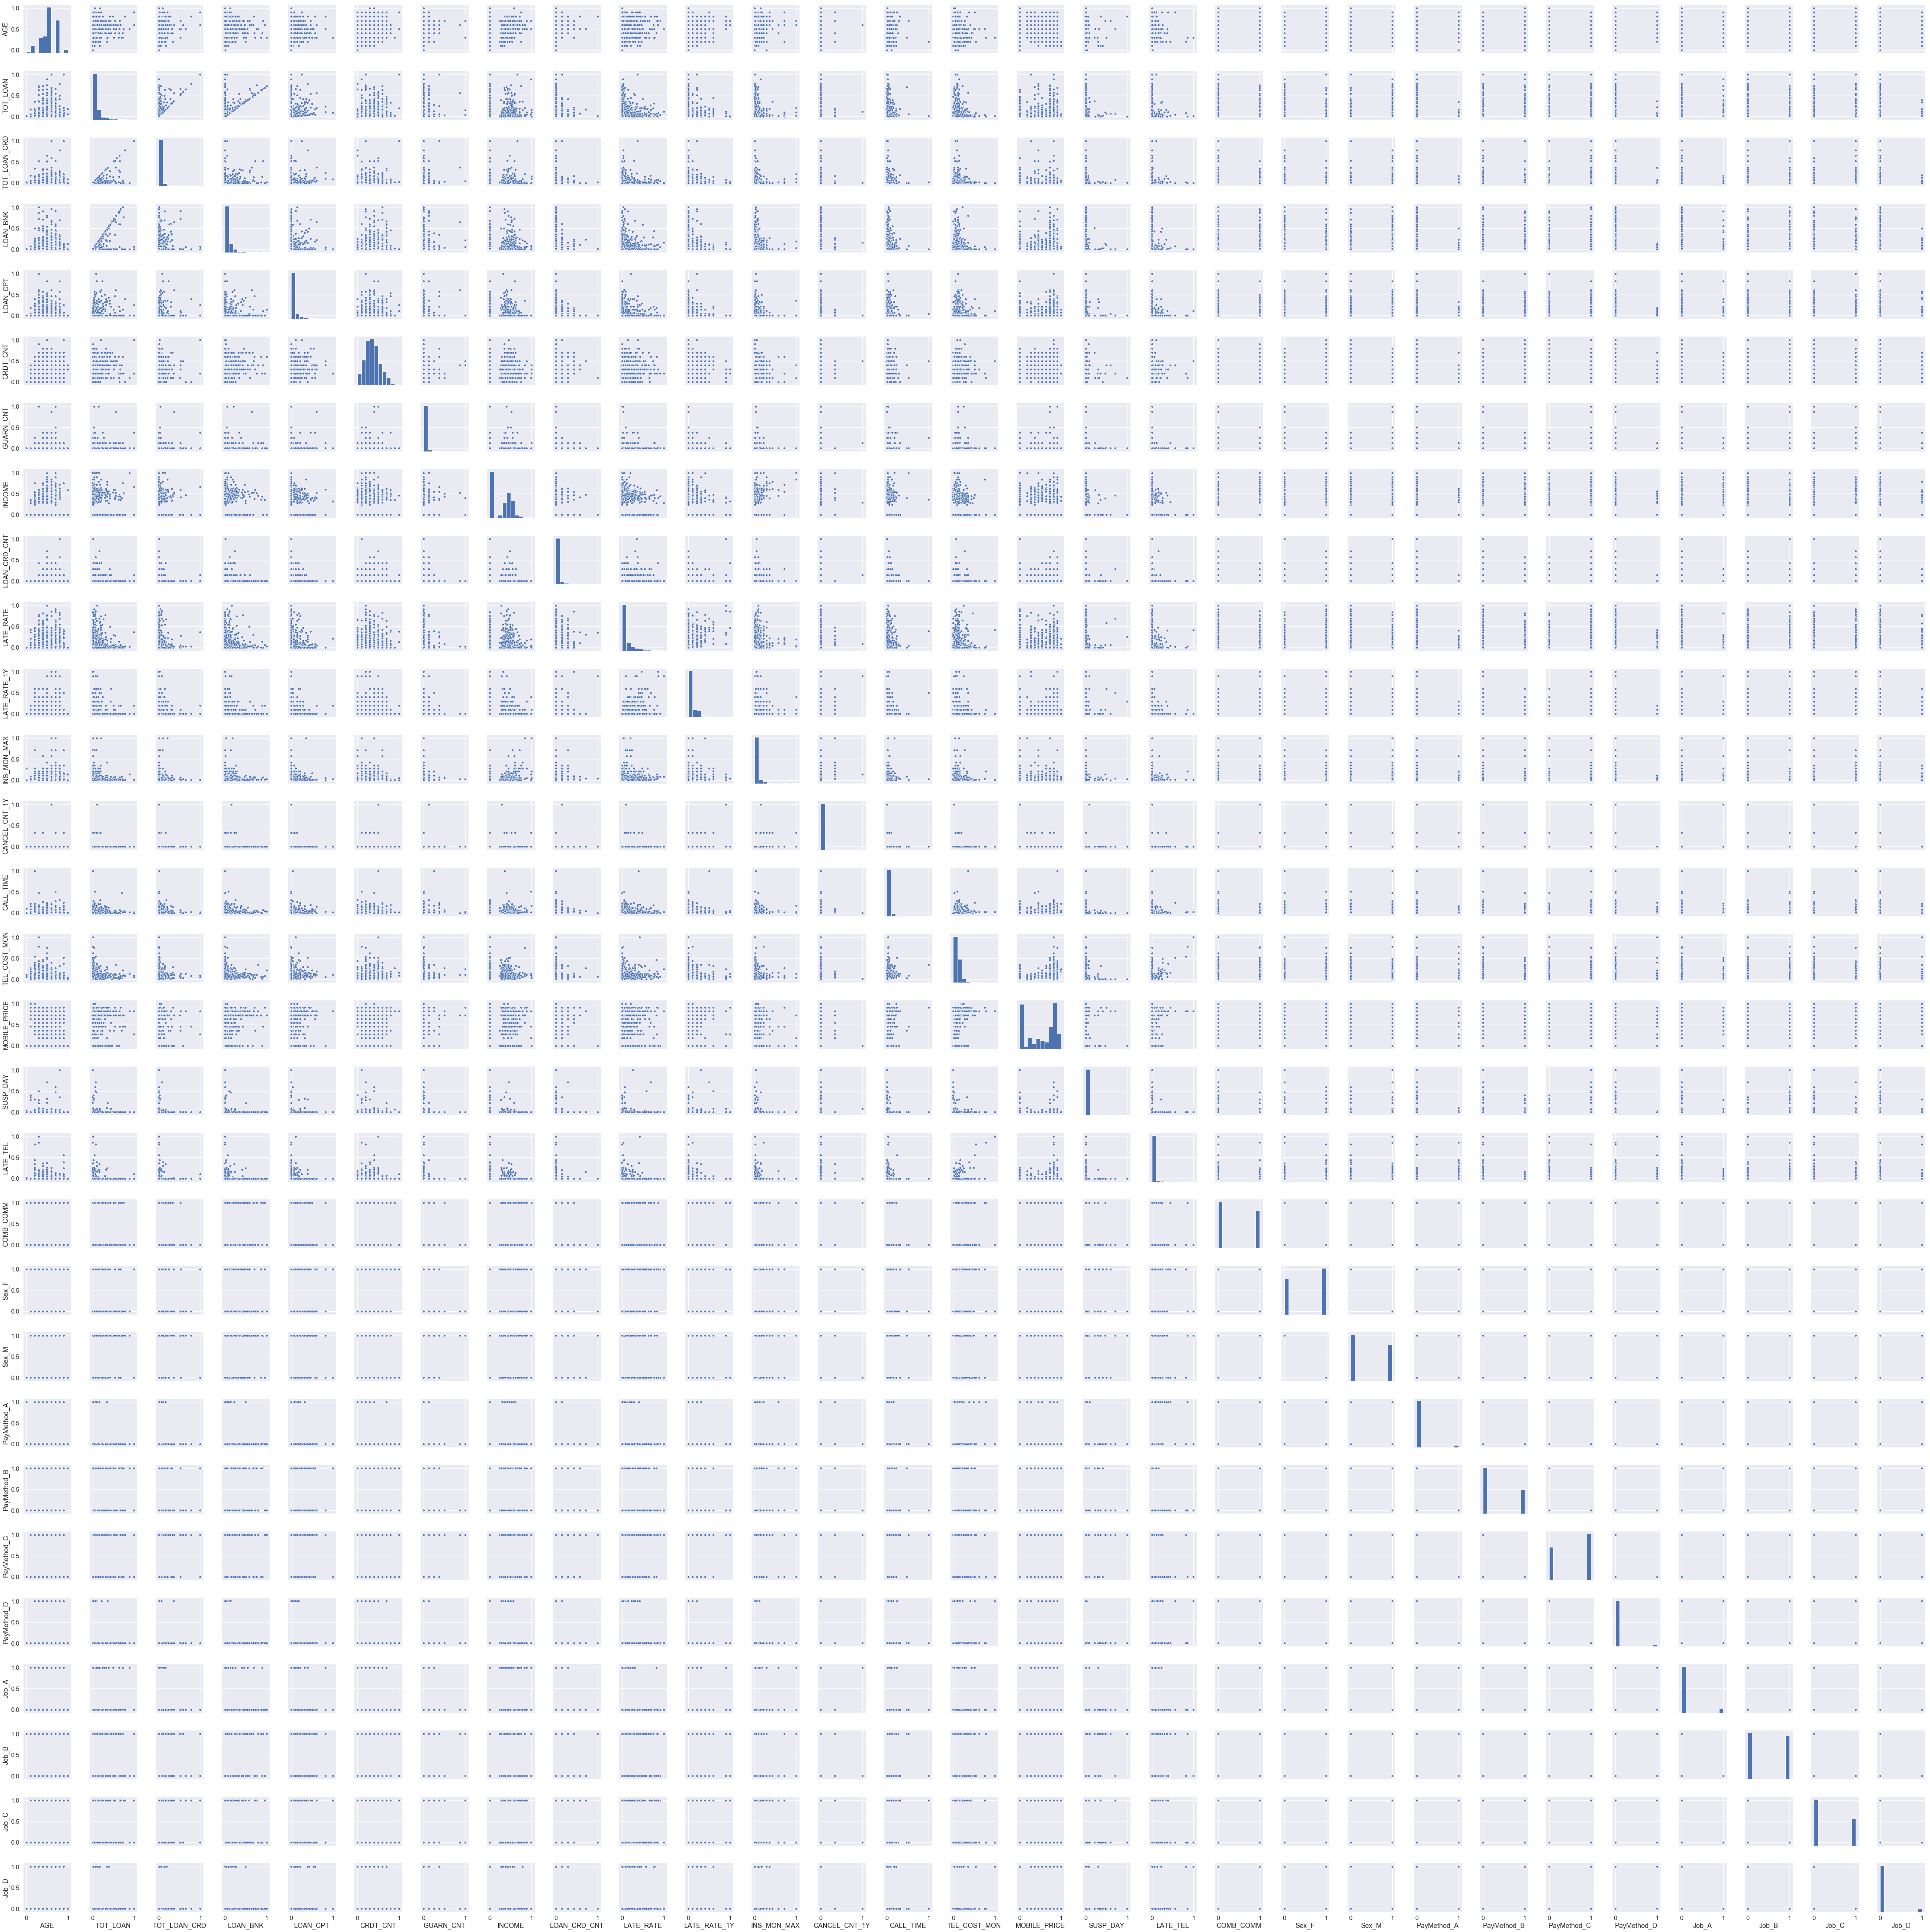

In [201]:
#sns.pairplot(X)
sns.pairplot(X)
plt.show()

In [ ]:
sns.pairplot(dat_processed, hue="Personal Loan")
plt.show()

In [262]:
# Y값 붙여서 


# columns  = ['TOT_LOAN', 'TOT_LOAN_CRD', 'LOAN_BNK', 'LOAN_CPT', 'CRDT_CNT',
#        'GUARN_CNT', 'INCOME', 'LOAN_CRD_CNT', 'LATE_RATE', 'LATE_RATE_1Y',
#        'INS_MON_MAX', 'CANCEL_CNT_1Y', 'CALL_TIME', 'TEL_COST_MON',
#        'MOBILE_PRICE', 'SUSP_DAY', 'LATE_TEL', 'COMB_COMM', 'Sex_F', 'Sex_M',
#        'PayMethod_A', 'PayMethod_B', 'PayMethod_C', 'PayMethod_D', 'Job_A',
#        'Job_B', 'Job_C', 'Job_D']

columns  = ['TOT_LOAN', 'TOT_LOAN_CRD', 'LOAN_BNK', 'LOAN_CPT','LOAN_CRD_CNT','LATE_RATE_1Y']


xy_temp=x[columns]

#xy_temp.head()
#xy_temp=xy_temp.join(y)
#xy_temp.head()


# 정규화
XY_TEMP= preprocessing.minmax_scale(xy_temp)


XY_TEMP = pd.DataFrame(XY_TEMP)
XY_TEMP.columns = xy_temp.columns


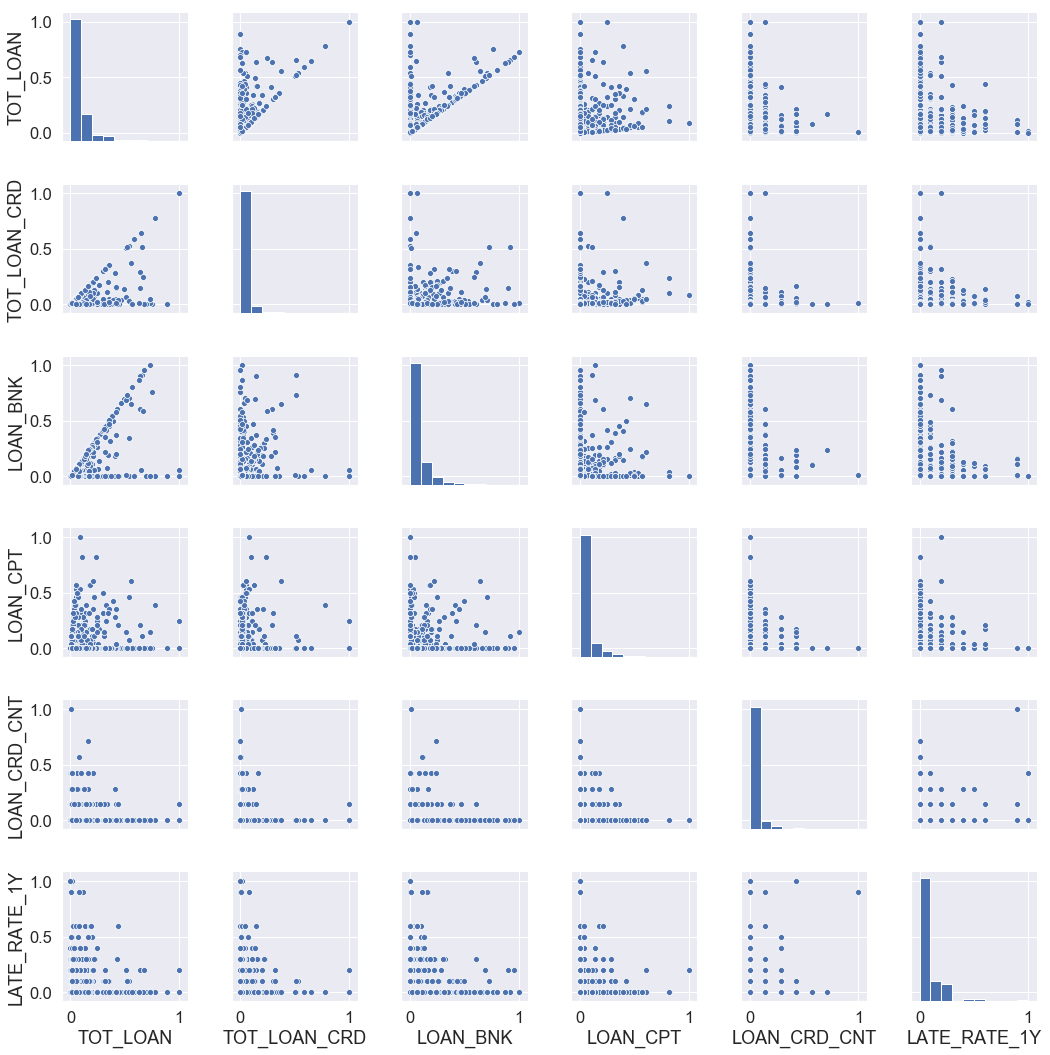

In [263]:
#sns.pairplot(X)
sns.pairplot(XY_TEMP)
plt.show()

In [285]:
############# 학습모델 구축을 위한 데이터 셋 나누기
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(800, 29) (200, 29) (800,) (200,)


In [286]:
# start out with the number of classes for neighbors
data_knn = KNeighborsClassifier(n_neighbors = 10, metric='euclidean')
data_knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

In [287]:
data_knn.fit(X_train, y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

In [288]:
data_knn.predict(X_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int64)

In [289]:
# R-square from training and test data
rsquared_train = data_knn.score(X_train, y_train)
rsquared_test = data_knn.score(X_test, y_test)
print ('Training data R-squared:')
print(rsquared_train)
print ('Test data R-squared:')
print(rsquared_test)

Training data R-squared:
1.0
Test data R-squared:
1.0


In [270]:
# confusion matrix
from sklearn.metrics import confusion_matrix

knn_confusion_matrix = confusion_matrix(y_true = y_test, y_pred = data_knn.predict(X_test))
print("The Confusion matrix:\n", knn_confusion_matrix)

The Confusion matrix:
 [[200]]
